### Import the  libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv(r'EV_market_segmentation_India.csv') 

In [175]:
df.shape

(600, 11)

In [176]:
df.head() 

,City,State,Income Group,Age Group,Daily Commute (km),EV Awareness Score,Charging Stations Density (per 100 sq km),Preferred EV Type,Govt Incentive Awareness,EV Sales (2024),ICE to EV Switch (%)
0,Bengaluru,Karnataka,Low,26-35,21,5.1,5,Commercial EV,No,3877,13.5
1,Bengaluru,Karnataka,Low,18-25,22,5.2,14,4-wheeler,Yes,14633,14.4
2,Bengaluru,Karnataka,High,18-25,6,8.7,17,2-wheeler,No,11330,9.1
3,Bengaluru,Karnataka,Mid,26-35,7,8.8,3,2-wheeler,No,10460,18.0
4,Bengaluru,Karnataka,Mid,50+,40,5.3,13,2-wheeler,Yes,5235,6.0


In [177]:
df.tail()

,City,State,Income Group,Age Group,Daily Commute (km),EV Awareness Score,Charging Stations Density (per 100 sq km),Preferred EV Type,Govt Incentive Awareness,EV Sales (2024),ICE to EV Switch (%)
595,Surat,Gujarat,Mid,18-25,37,9.3,13,2-wheeler,No,14213,19.5
596,Surat,Gujarat,High,36-50,36,7.1,6,4-wheeler,No,13149,15.8
597,Surat,Gujarat,High,26-35,12,5.7,12,4-wheeler,Yes,5801,13.9
598,Surat,Gujarat,High,18-25,34,5.3,17,2-wheeler,No,3641,19.5
599,Surat,Gujarat,High,50+,16,5.3,15,Commercial EV,Yes,11574,13.9


In [178]:
df.dtypes

City                                          object
State                                         object
Income Group                                  object
Age Group                                     object
Daily Commute (km)                             int64
EV Awareness Score                           float64
Charging Stations Density (per 100 sq km)      int64
Preferred EV Type                             object
Govt Incentive Awareness                      object
EV Sales (2024)                                int64
ICE to EV Switch (%)                         float64
dtype: object

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City                                       600 non-null    object 
 1   State                                      600 non-null    object 
 2   Income Group                               600 non-null    object 
 3   Age Group                                  600 non-null    object 
 4   Daily Commute (km)                         600 non-null    int64  
 5   EV Awareness Score                         600 non-null    float64
 6   Charging Stations Density (per 100 sq km)  600 non-null    int64  
 7   Preferred EV Type                          600 non-null    object 
 8   Govt Incentive Awareness                   600 non-null    object 
 9   EV Sales (2024)                            600 non-null    int64  
 10  ICE to EV Switch (%)      

In [180]:
df.columns

Index(['City', 'State', 'Income Group', 'Age Group', 'Daily Commute (km)',
       'EV Awareness Score', 'Charging Stations Density (per 100 sq km)',
       'Preferred EV Type', 'Govt Incentive Awareness', 'EV Sales (2024)',
       'ICE to EV Switch (%)'],
      dtype='object')

In [181]:
df.isnull().sum()

City                                         0
State                                        0
Income Group                                 0
Age Group                                    0
Daily Commute (km)                           0
EV Awareness Score                           0
Charging Stations Density (per 100 sq km)    0
Preferred EV Type                            0
Govt Incentive Awareness                     0
EV Sales (2024)                              0
ICE to EV Switch (%)                         0
dtype: int64

Identifying Target Customer Segments for EV Marketing

Top Customer Segments for EV Marketing:
    Income Group Age Group       City  EV Sales (2024)  ICE to EV Switch (%)
49           Low     18-25    Chennai            86528             12.244444
12          High     26-35  Ahmedabad            82876             13.830000
132          Mid       50+     Jaipur            73230              9.714286
60           Low     26-35    Chennai            71942             14.800000
37          High       50+    Chennai            70466             10.816667
64           Low     26-35     Jaipur            68485              8.542857
108          Mid     26-35      Delhi            67231             12.087500
105          Mid     18-25      Surat            65154             14.016667
131          Mid       50+     Indore            64475             12.271429
29          High     36-50     Indore            64441             10.637500


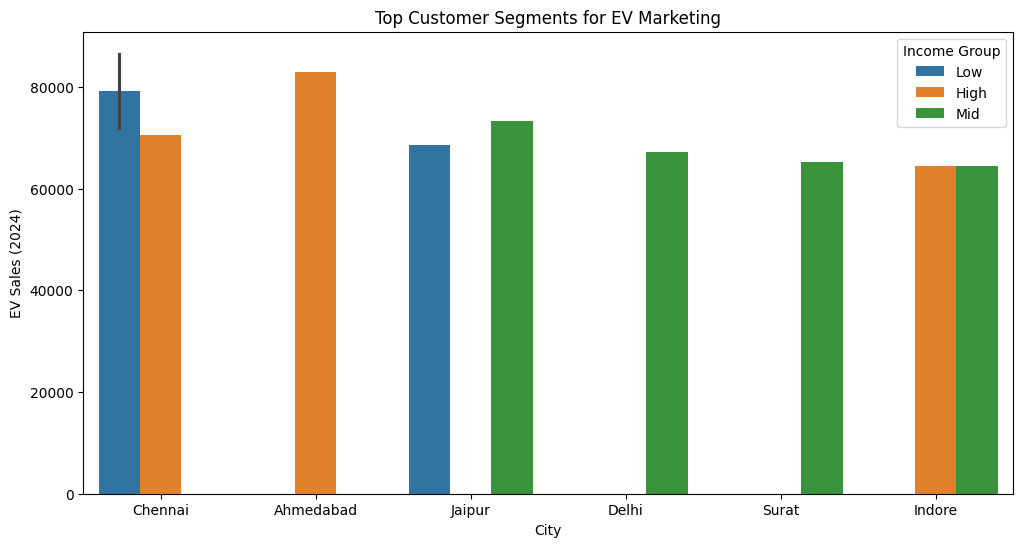

In [182]:
# Group by income group, age group, and city to analyze EV sales and switching rates

segmentation = df.groupby(['Income Group', 'Age Group', 'City']).agg({
    'EV Sales (2024)': 'sum',
    'ICE to EV Switch (%)': 'mean'
}).reset_index()

# Sort by EV sales to identify top segments 

top_segments = segmentation.sort_values(by='EV Sales (2024)', ascending=False).head(10)
print("Top Customer Segments for EV Marketing:")
print(top_segments)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=top_segments, x='City', y='EV Sales (2024)', hue='Income Group')
plt.title("Top Customer Segments for EV Marketing")
plt.show()

3. Optimizing Charging Infrastructure Deployment

Cities with High EV Sales but Low Charging Density:
        City  Charging Stations Density (per 100 sq km)  EV Sales (2024)  \
1  Bengaluru                                      10.88           420564   
3      Delhi                                      10.96           413858   
5     Indore                                      11.50           428608   
6     Jaipur                                      11.82           425499   
7    Kolkata                                      11.42           407242   

   Charging Need  
1   38654.779412  
3   37760.766423  
5   37270.260870  
6   35998.223350  
7   35660.420315  


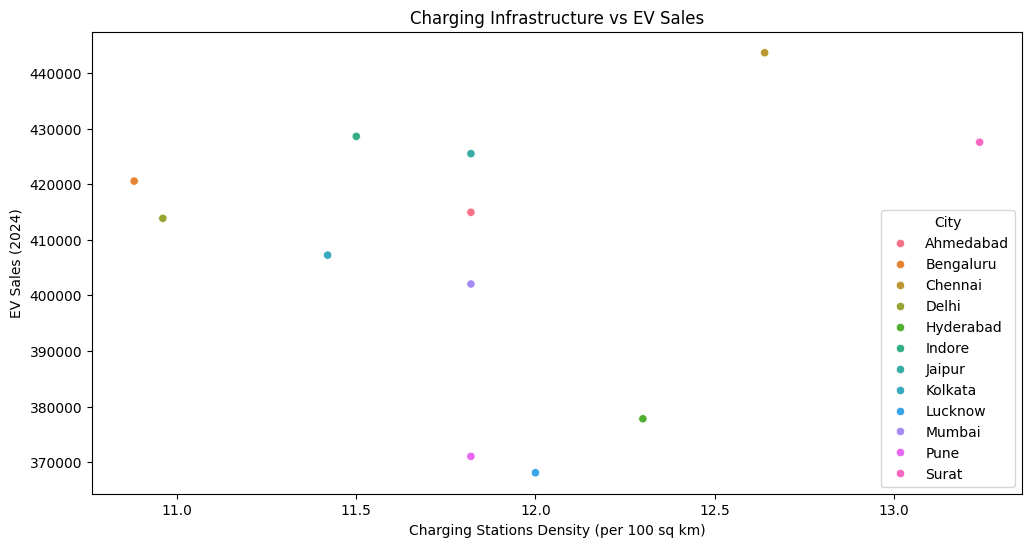

In [183]:
# Group by city to analyze charging station density and EV sales

charging_analysis = df.groupby('City').agg({
    'Charging Stations Density (per 100 sq km)': 'mean',
    'EV Sales (2024)': 'sum'
}).reset_index()


# Identify cities with high EV sales but low charging density

charging_analysis['Charging Need'] = charging_analysis['EV Sales (2024)'] / charging_analysis['Charging Stations Density (per 100 sq km)']
charging_need = charging_analysis.sort_values(by='Charging Need', ascending=False).head(5)
print("Cities with High EV Sales but Low Charging Density:")
print(charging_need)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=charging_analysis, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Charging Infrastructure vs EV Sales")
plt.show()

4. Assessing the Impact of Government Incentives

Impact of Government Incentives on EV Adoption:
  Govt Incentive Awareness  EV Sales (2024)  ICE to EV Switch (%)
0                       No          2492522             12.590102
1                      Yes          2408357             12.217915


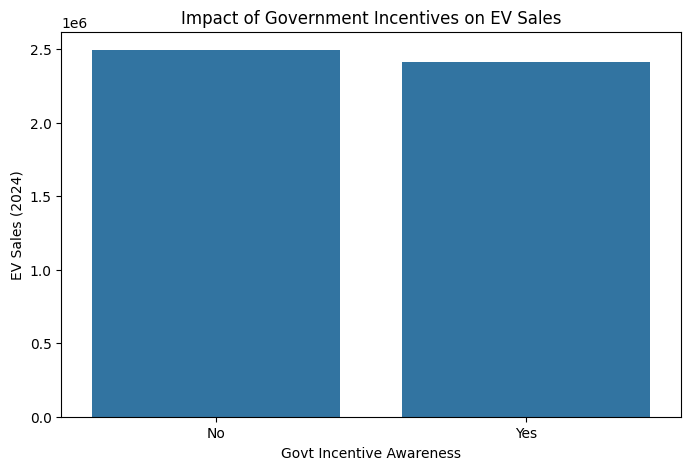

In [184]:
# Group by government incentive awareness to analyze EV sales and switching rates

incentive_analysis = df.groupby('Govt Incentive Awareness').agg({
    'EV Sales (2024)': 'sum',
    'ICE to EV Switch (%)': 'mean'
}).reset_index()

print("Impact of Government Incentives on EV Adoption:")
print(incentive_analysis)

# Visualization

plt.figure(figsize=(8, 5))
sns.barplot(data=incentive_analysis, x='Govt Incentive Awareness', y='EV Sales (2024)')
plt.title("Impact of Government Incentives on EV Sales")
plt.show()

5. Predicting Future EV Demand

High-Demand Segments for Future EV Sales:
          City Income Group Age Group  EV Sales (2024)
26     Chennai          Low     18-25            86528
1    Ahmedabad         High     26-35            82876
78      Jaipur          Mid       50+            73230
27     Chennai          Low     26-35            71942
25     Chennai         High       50+            70466
73      Jaipur          Low     26-35            68485
42       Delhi          Mid     26-35            67231
133      Surat          Mid     18-25            65154
67      Indore          Mid       50+            64475
59      Indore         High     36-50            64441


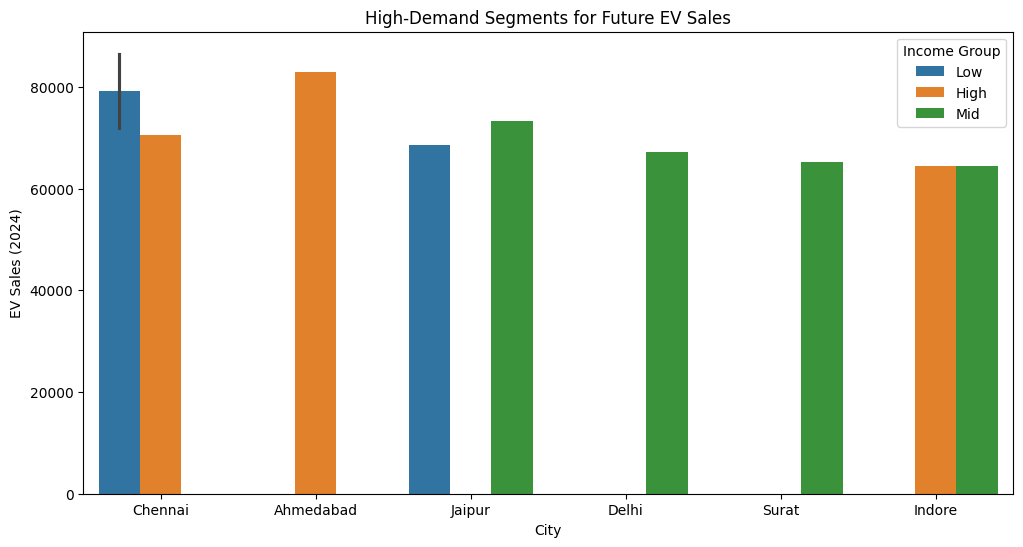

In [185]:
# Group by city, income group, and age group to analyze historical EV sales trends

future_demand = df.groupby(['City', 'Income Group', 'Age Group']).agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

# Sort by EV sales to identify high-demand segments

high_demand_segments = future_demand.sort_values(by='EV Sales (2024)', ascending=False).head(10)
print("High-Demand Segments for Future EV Sales:")
print(high_demand_segments)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=high_demand_segments, x='City', y='EV Sales (2024)', hue='Income Group')
plt.title("High-Demand Segments for Future EV Sales")
plt.show()

6. Understanding Barriers to EV Adoption
python


Segments with Low EV Sales Despite High Awareness:
         City Income Group Age Group  EV Sales (2024)  \
0   Ahmedabad         High     18-25             2121   
1   Ahmedabad         High     26-35             2200   
2   Ahmedabad         High     36-50             3670   
3   Ahmedabad          Low     18-25             1650   
4   Ahmedabad          Low     26-35             2097   
..        ...          ...       ...              ...   
61      Surat         High     18-25             1731   
62      Surat         High     26-35             8792   
63      Surat          Low     26-35             9715   
64      Surat          Mid     36-50             2408   
65      Surat          Mid       50+             2011   

    Charging Stations Density (per 100 sq km)  
0                                         3.0  
1                                        11.0  
2                                        16.0  
3                                        10.0  
4                       

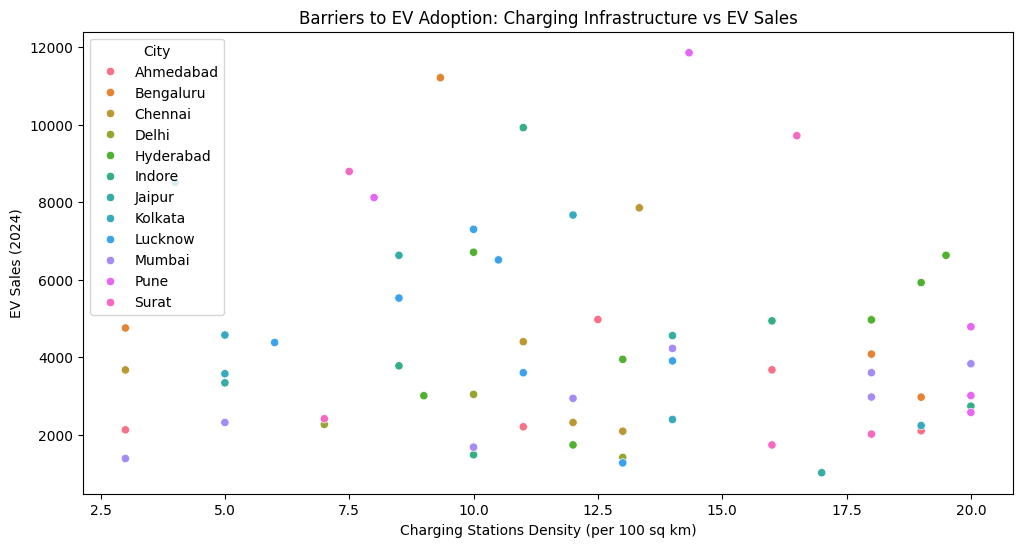

In [186]:
# Analyze segments with low EV sales despite high awareness

barrier_analysis = df[(df['EV Awareness Score'] > 7) & (df['EV Sales (2024)'] < 5000)]
barrier_segments = barrier_analysis.groupby(['City', 'Income Group', 'Age Group']).agg({
    'EV Sales (2024)': 'sum',
    'Charging Stations Density (per 100 sq km)': 'mean'
}).reset_index()

print("Segments with Low EV Sales Despite High Awareness:")
print(barrier_segments)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=barrier_segments, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Barriers to EV Adoption: Charging Infrastructure vs EV Sales")
plt.show()

7. Developing Competitive Pricing Strategies

EV Sales and Switching Rates by Income Group:
  Income Group  EV Sales (2024)  ICE to EV Switch (%)
0         High          1683523             12.754717
1          Low          1728757             12.114085
2          Mid          1488599             12.317143


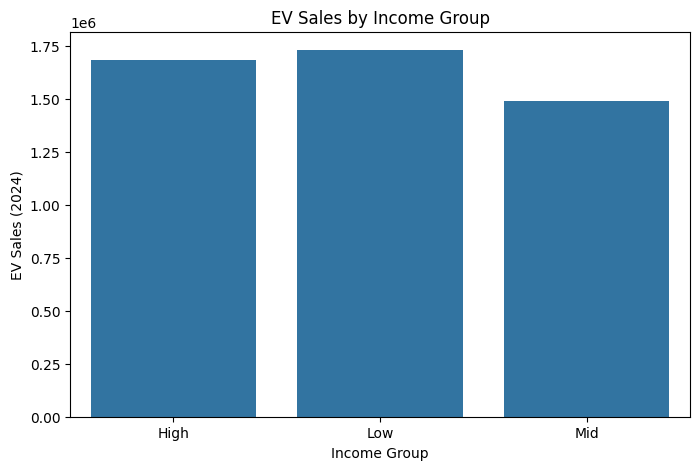

In [187]:
# Group by income group to analyze EV sales and switching rates

pricing_analysis = df.groupby('Income Group').agg({
    'EV Sales (2024)': 'sum',
    'ICE to EV Switch (%)': 'mean'
}).reset_index()

print("EV Sales and Switching Rates by Income Group:")
print(pricing_analysis)

# Visualization

plt.figure(figsize=(8, 5))
sns.barplot(data=pricing_analysis, x='Income Group', y='EV Sales (2024)')
plt.title("EV Sales by Income Group")
plt.show()

9. Improving Customer Experience for EV Owners

Charging Infrastructure for Long Commuters:
         City  Charging Stations Density (per 100 sq km)  EV Sales (2024)
0   Ahmedabad                                  13.250000            94394
1   Bengaluru                                  10.133333           126006
2     Chennai                                  14.166667           122845
3       Delhi                                  11.230769            92320
4   Hyderabad                                  13.736842           144967
5      Indore                                  12.400000            88940
6      Jaipur                                  11.461538           117131
7     Kolkata                                  11.894737           175178
8     Lucknow                                  10.571429           103043
9      Mumbai                                  14.200000            86307
10       Pune                                  15.777778            54494
11      Surat                                  12.800000           1

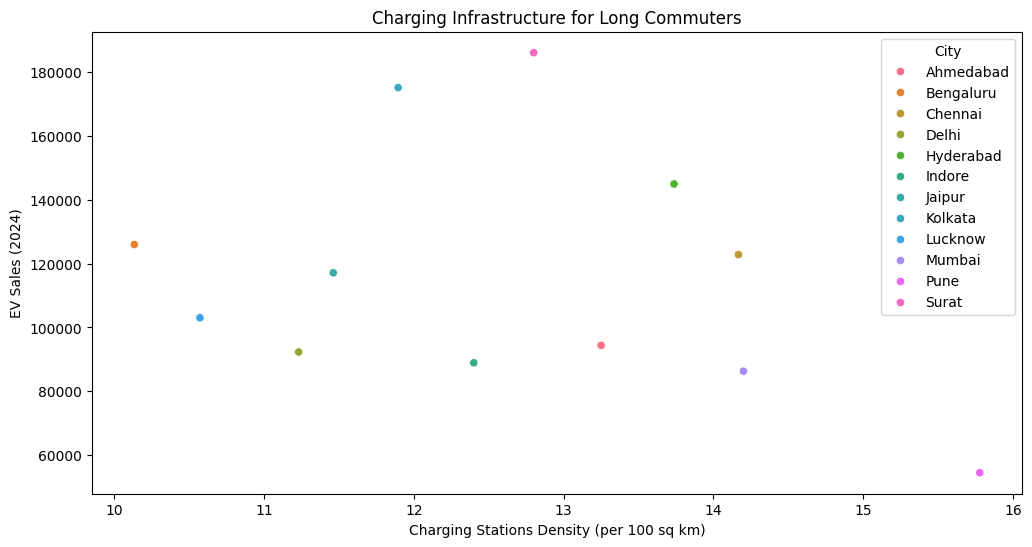

In [188]:
# Analyze long commuters and charging infrastructure

long_commuters = df[df['Daily Commute (km)'] > 30]
commuter_analysis = long_commuters.groupby('City').agg({
    'Charging Stations Density (per 100 sq km)': 'mean',
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Charging Infrastructure for Long Commuters:")
print(commuter_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=commuter_analysis, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Charging Infrastructure for Long Commuters")
plt.show()

10. Promoting Commercial EV Adoption

Commercial EV Adoption by City:
         City  EV Sales (2024)
0   Ahmedabad           135387
1   Bengaluru           131273
2     Chennai           110041
3       Delhi           180993
4   Hyderabad           109737
5      Indore           144680
6      Jaipur           123053
7     Kolkata           121917
8     Lucknow           124491
9      Mumbai           143169
10       Pune           116896
11      Surat           165119


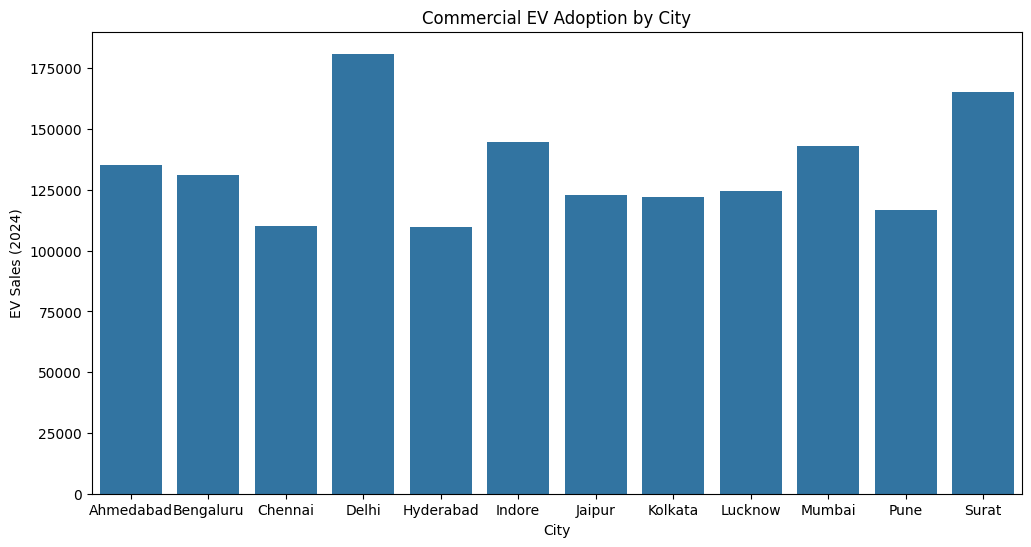

In [189]:
# Analyze commercial EV adoption

commercial_ev = df[df['Preferred EV Type'] == 'Commercial EV']
commercial_analysis = commercial_ev.groupby('City').agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Commercial EV Adoption by City:")
print(commercial_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=commercial_analysis, x='City', y='EV Sales (2024)')
plt.title("Commercial EV Adoption by City")
plt.show()

11. Evaluating the ROI of Awareness Campaigns

Impact of EV Awareness on Sales:
    EV Awareness Score  EV Sales (2024)
0                  5.0            54827
1                  5.1           103819
2                  5.2            92677
3                  5.3            86764
4                  5.4           170762
5                  5.5           155367
6                  5.6            90488
7                  5.7           118954
8                  5.8            91608
9                  5.9           103793
10                 6.0           123366
11                 6.1            55537
12                 6.2            70206
13                 6.3           128124
14                 6.4           110255
15                 6.5            75463
16                 6.6           118393
17                 6.7           118408
18                 6.8            75959
19                 6.9            99944
20                 7.0           103939
21                 7.1           107033
22                 7.2           108329
23     

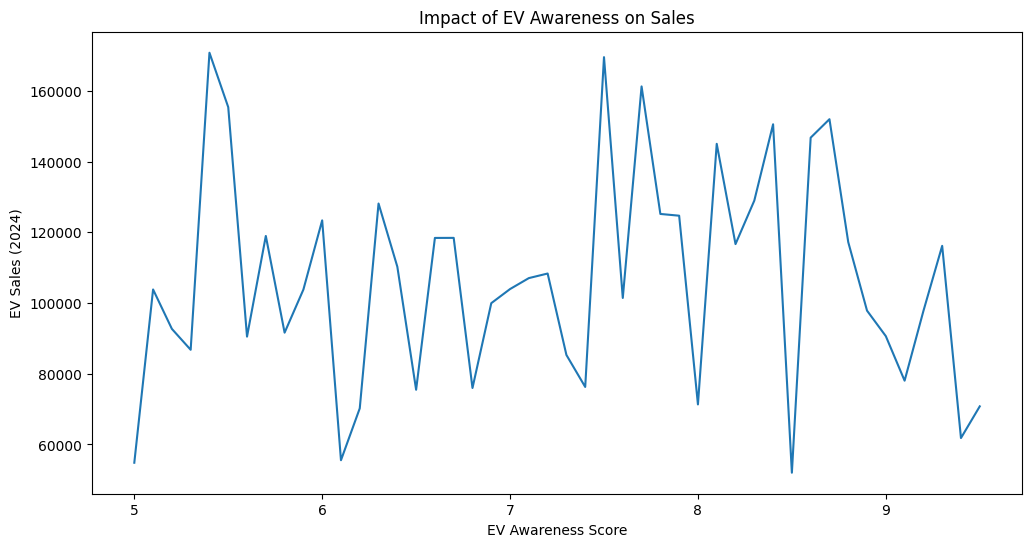

In [190]:
# Group by EV awareness score to analyze EV sales

awareness_analysis = df.groupby('EV Awareness Score').agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Impact of EV Awareness on Sales:")
print(awareness_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.lineplot(data=awareness_analysis, x='EV Awareness Score', y='EV Sales (2024)')
plt.title("Impact of EV Awareness on Sales")
plt.show()

12. Addressing Regional Disparities in EV Adoption

Regional Disparities in EV Adoption:
         City  EV Sales (2024)  Charging Stations Density (per 100 sq km)
0   Ahmedabad           414946                                      11.82
1   Bengaluru           420564                                      10.88
2     Chennai           443658                                      12.64
3       Delhi           413858                                      10.96
4   Hyderabad           377792                                      12.30
5      Indore           428608                                      11.50
6      Jaipur           425499                                      11.82
7     Kolkata           407242                                      11.42
8     Lucknow           368087                                      12.00
9      Mumbai           402039                                      11.82
10       Pune           371029                                      11.82
11      Surat           427557                                      13.24


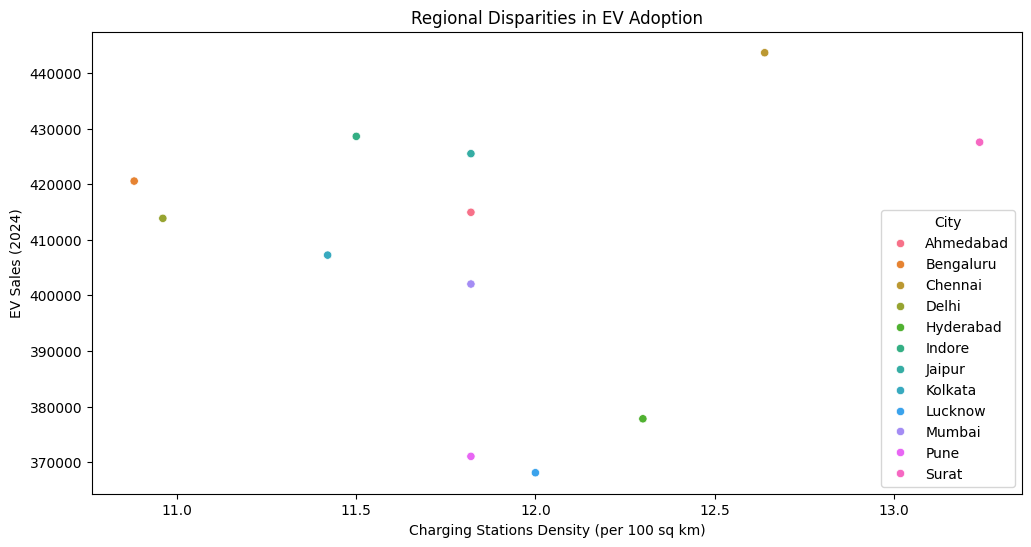

In [191]:
# Analyze EV adoption by city

regional_analysis = df.groupby('City').agg({
    'EV Sales (2024)': 'sum',
    'Charging Stations Density (per 100 sq km)': 'mean'
}).reset_index()

print("Regional Disparities in EV Adoption:")
print(regional_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=regional_analysis, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Regional Disparities in EV Adoption")
plt.show()

13. Designing EV Models for Specific Segments

Preferred EV Types by Income and Age Groups:
   Income Group Age Group Preferred EV Type  EV Sales (2024)
0          High     18-25         2-wheeler           121625
1          High     18-25         4-wheeler           205559
2          High     18-25     Commercial EV           135802
3          High     26-35         2-wheeler           166057
4          High     26-35         4-wheeler           145915
5          High     26-35     Commercial EV           149693
6          High     36-50         2-wheeler           123323
7          High     36-50         4-wheeler           143181
8          High     36-50     Commercial EV            55453
9          High       50+         2-wheeler           185698
10         High       50+         4-wheeler           142885
11         High       50+     Commercial EV           108332
12          Low     18-25         2-wheeler           161022
13          Low     18-25         4-wheeler           183637
14          Low     18-25     Commercial

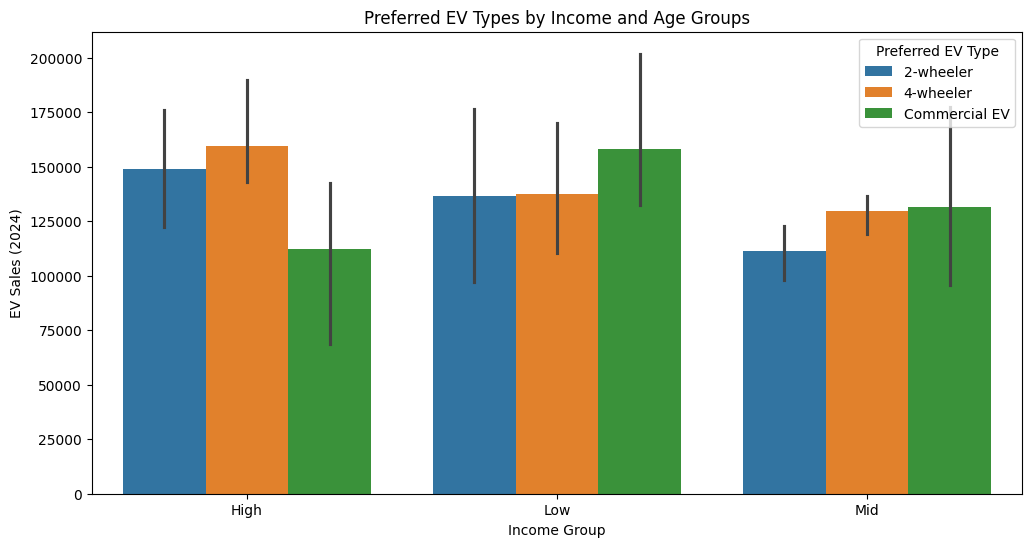

In [192]:
# Analyze preferred EV types by income and age groups

ev_type_analysis = df.groupby(['Income Group', 'Age Group', 'Preferred EV Type']).agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Preferred EV Types by Income and Age Groups:")
print(ev_type_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=ev_type_analysis, x='Income Group', y='EV Sales (2024)', hue='Preferred EV Type')
plt.title("Preferred EV Types by Income and Age Groups")
plt.show()

14. Reducing Carbon Footprint in High-Traffic Cities

EV Adoption in High-Traffic Cities:
        City  EV Sales (2024)  Charging Stations Density (per 100 sq km)
0  Bengaluru           420564                                      10.88
1      Delhi           413858                                      10.96
2     Mumbai           402039                                      11.82


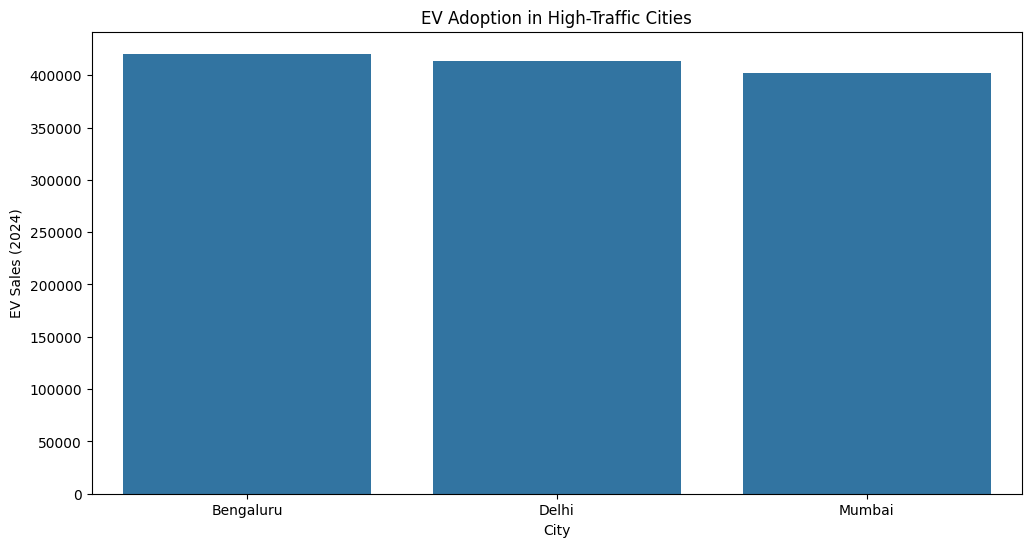

In [193]:
# Focus on high-traffic cities

high_traffic_cities = ['Delhi', 'Mumbai', 'Bengaluru']
traffic_analysis = df[df['City'].isin(high_traffic_cities)].groupby('City').agg({
    'EV Sales (2024)': 'sum',
    'Charging Stations Density (per 100 sq km)': 'mean'
}).reset_index()

print("EV Adoption in High-Traffic Cities:")
print(traffic_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=traffic_analysis, x='City', y='EV Sales (2024)')
plt.title("EV Adoption in High-Traffic Cities")
plt.show()

15. Assessing the Impact of Daily Commute on EV Adoption

EV Adoption by Daily Commute Distance:
    Daily Commute (km)  EV Sales (2024)
0                    5           148134
1                    6           112943
2                    7           107876
3                    8           170050
4                    9           135546
5                   10           135735
6                   11           214708
7                   12            94505
8                   13           115910
9                   14            65941
10                  15            92671
11                  16           152902
12                  17           148961
13                  18           214857
14                  19           118960
15                  20           161864
16                  21            95492
17                  22           135053
18                  23           132763
19                  24           101467
20                  25            73625
21                  26           133699
22                  27           173111
2

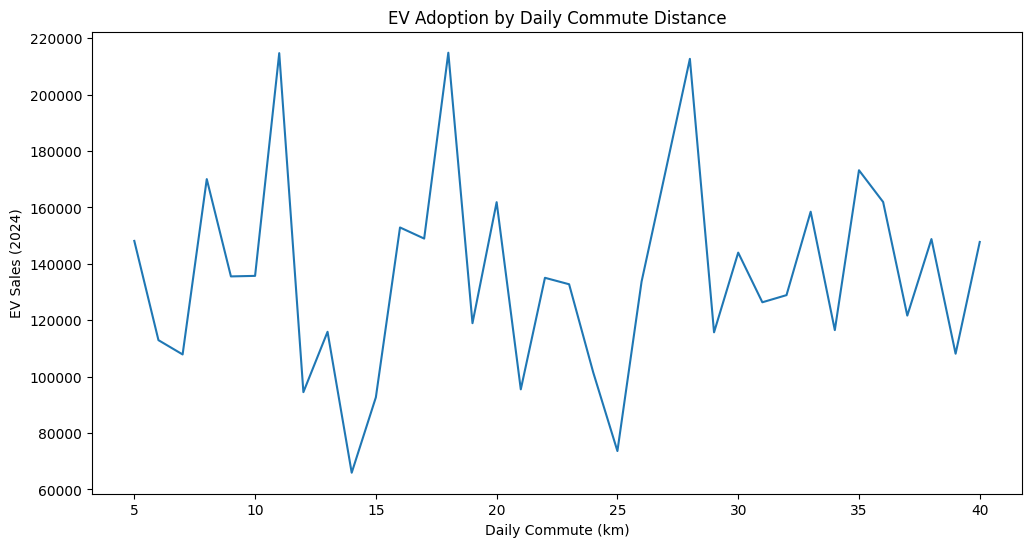

In [194]:
# Analyze EV adoption by daily commute distance

commute_analysis = df.groupby('Daily Commute (km)').agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("EV Adoption by Daily Commute Distance:")
print(commute_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.lineplot(data=commute_analysis, x='Daily Commute (km)', y='EV Sales (2024)')
plt.title("EV Adoption by Daily Commute Distance")
plt.show()

## Clustering

### 1. K-Means Clustering for Customer Segmentation

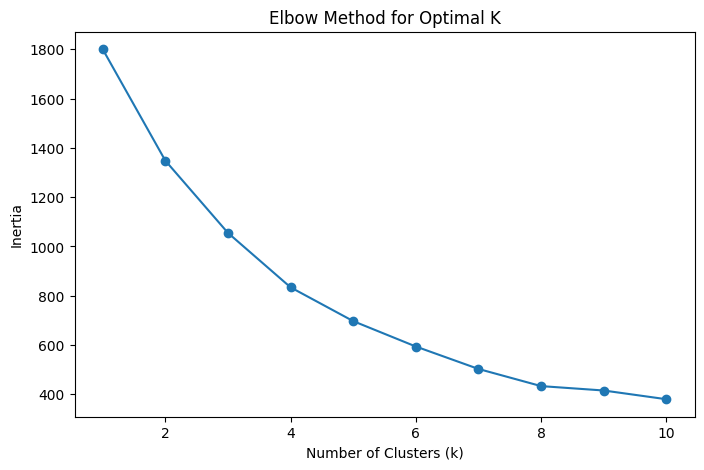

Cluster Analysis:
   Cluster  EV Awareness Score  Daily Commute (km)  EV Sales (2024)
0        0            8.503483           23.233831      5971.228856
1        1            7.123894           21.712389     12367.119469
2        2            6.041618           23.150289      5235.219653


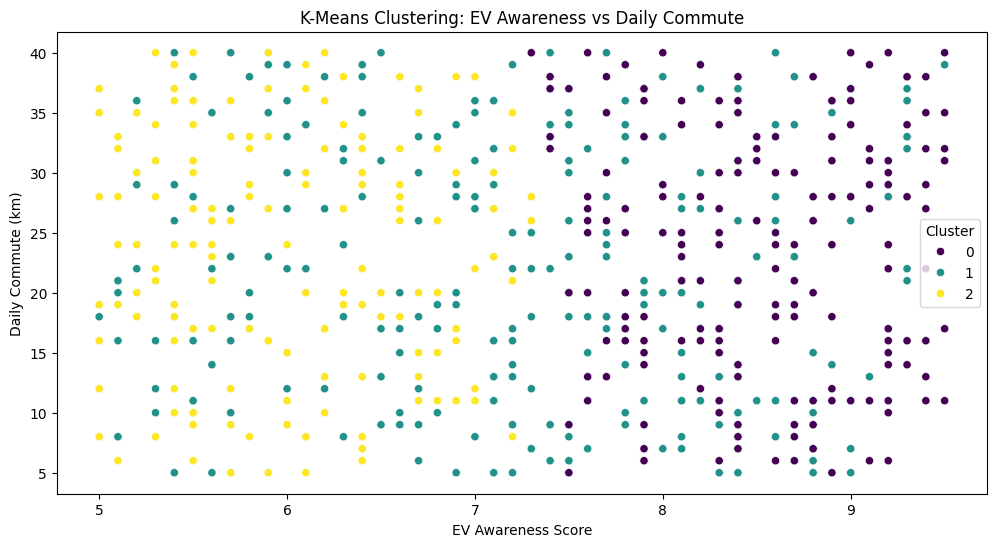

In [195]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the  relevant features for clustering

features = ['EV Awareness Score', 'Daily Commute (km)', 'EV Sales (2024)']
X = df[features]

## Standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Elbow Method

inertia = []       
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means clustering with the optimal number of clusters (e.g., k=3)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


cluster_analysis = df.groupby('Cluster').agg({
    'EV Awareness Score': 'mean',
    'Daily Commute (km)': 'mean',
    'EV Sales (2024)': 'mean'
}).reset_index()

print("Cluster Analysis:")
print(cluster_analysis)


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='EV Awareness Score', y='Daily Commute (km)', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering: EV Awareness vs Daily Commute")
plt.show()

### 2. Hierarchical Clustering for City Segmentation

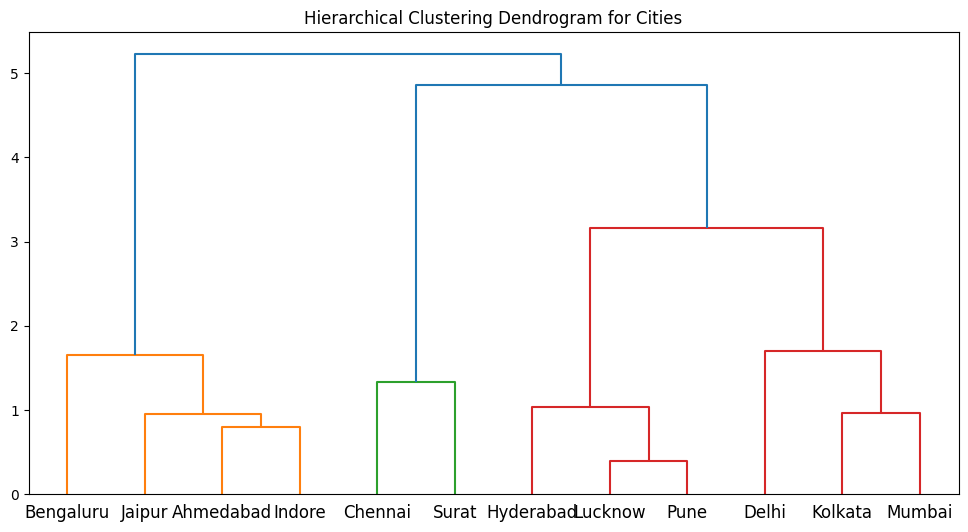

In [196]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering

city_features = ['EV Sales (2024)', 'Charging Stations Density (per 100 sq km)', 'EV Awareness Score']
city_data = df.groupby('City')[city_features].mean().reset_index()

# Standardize the features

scaler = StandardScaler()
city_data_scaled = scaler.fit_transform(city_data[city_features])

# hierarchical clustering

linked = linkage(city_data_scaled, method='ward')

# dendrogram

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=city_data['City'].values, orientation='top')
plt.title("Hierarchical Clustering Dendrogram for Cities")
plt.show()

City Cluster Analysis:
   Cluster  EV Sales (2024)  Charging Stations Density (per 100 sq km)  \
0        0      7800.156667                                     11.720   
1        1      8448.085000                                     11.505   
2        2      8712.150000                                     12.940   

   EV Awareness Score  
0            7.207333  
1            7.447500  
2            7.127000  


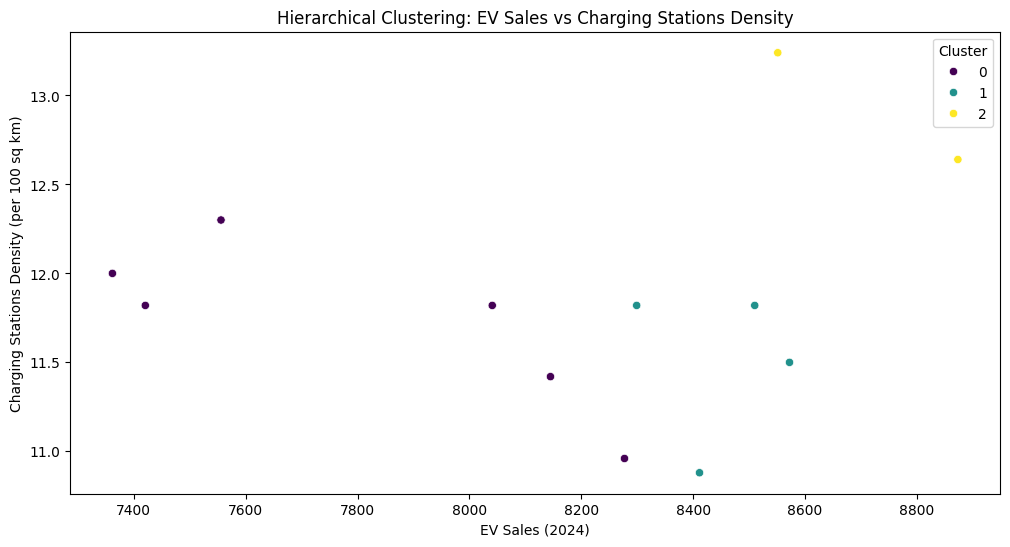

In [197]:
# Assign clusters

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
city_data['Cluster'] = cluster.fit_predict(city_data_scaled)

# Analyze the clusters

city_cluster_analysis = city_data.groupby('Cluster').agg({
    'EV Sales (2024)': 'mean',
    'Charging Stations Density (per 100 sq km)': 'mean',
    'EV Awareness Score': 'mean'
}).reset_index()

print("City Cluster Analysis:")
print(city_cluster_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=city_data, x='EV Sales (2024)', y='Charging Stations Density (per 100 sq km)', hue='Cluster', palette='viridis')
plt.title("Hierarchical Clustering: EV Sales vs Charging Stations Density")
plt.show()

###  3. PCA for Dimensionality Reduction and Visualization

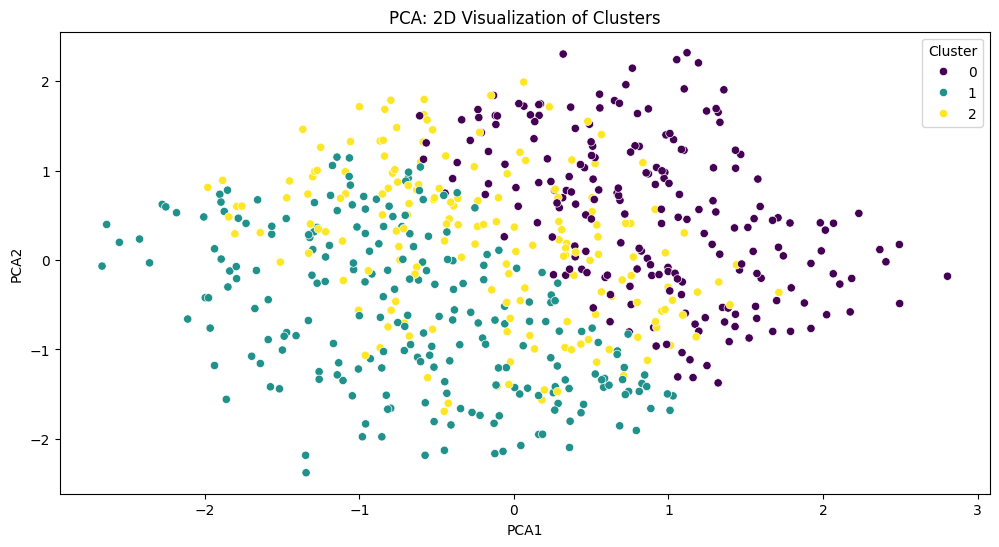

In [198]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters in 2D
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("PCA: 2D Visualization of Clusters")
plt.show()